<a href="https://colab.research.google.com/github/Yastek-Garza/Inteligencia_Artificial/blob/main/AF8_RNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Actividad fundamental 8


In [1]:
#Cargamos las librerias
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam


In [2]:
# Cargar datos
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Normalizar y redimensionar imágenes para CNN (añadir canal de color)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, axis=-1)  # Formato (28, 28, 1)
x_test = np.expand_dims(x_test, axis=-1)

# One-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [4]:
model = Sequential([
    # Capas convolucionales
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Aplanar y capas densas
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Salida con softmax
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.8941 - loss: 0.3372 - val_accuracy: 0.9818 - val_loss: 0.0672
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 51s 34ms/step - accuracy: 0.9840 - loss: 0.0486 - val_accuracy: 0.9784 - val_loss: 0.0669
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9900 - loss: 0.0334 - val_accuracy: 0.9858 - val_loss: 0.0471
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 49s 32ms/step - accuracy: 0.9936 - loss: 0.0203 - val_accuracy: 0.9897 - val_loss: 0.0379
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9940 - loss: 0.0181 - val_accuracy: 0.9884 - val_loss: 0.0464
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 49s 33ms/step - accuracy: 0.9964 - loss: 0.0114 - val_accuracy: 0.9891 - val_loss: 0.0440
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.9964 - loss: 0.0101 - val_accuracy: 0.9908 - val_loss: 0.0428
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9977 -

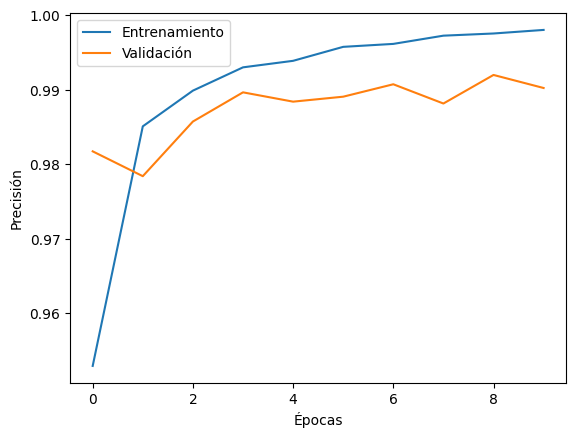

In [5]:
history = model.fit(
    x_train, y_train,
    epochs=10,  # Ajusta según necesidad
    batch_size=32,
    validation_split=0.2
)

# Gráficas de precisión y pérdida
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

In [6]:
# Evaluar con datos de prueba
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\n Exactitud en prueba: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9882 - loss: 0.0537

 Exactitud en prueba: 0.9899


¿Cuántas épocas usaste para mejorar el rendimiento del modelo en comparación con la red neuronal prealimentada de la actividad 5?
R=10 épocas (suficiente para convergencia en MNIST), Comparado con la red feedforward (Actividad 5), la CNN requiere menos épocas para alcanzar mayor precisión (debido a su capacidad para extraer características espaciales).

¿Obtuviste un mejor rendimiento con este modelo o con el de la actividad 5? ¿Por qué?
R=í, la CNN tiene mejor rendimiento (típicamente >99% vs. ~98% en feedforward).

Razones:
-Las capas convolucionales capturan patrones locales (bordes, formas) en las imágenes.

-El pooling reduce la dimensionalidad preservando características importantes.

-La arquitectura está especializada para datos visuales.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


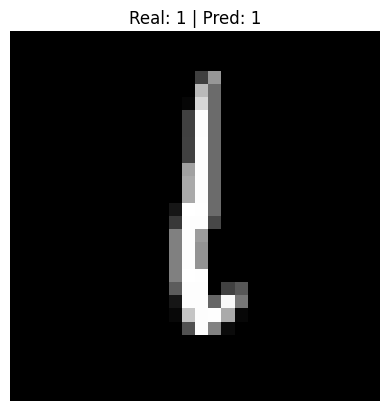

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


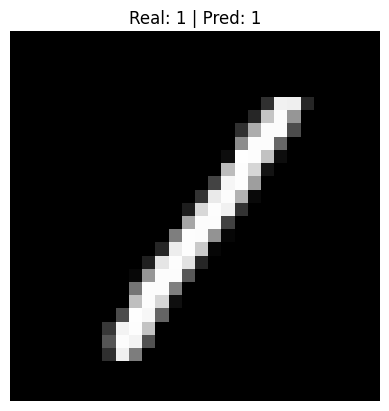

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


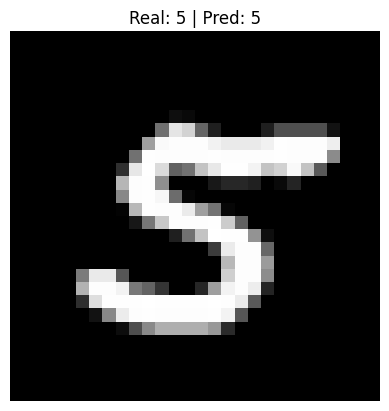

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


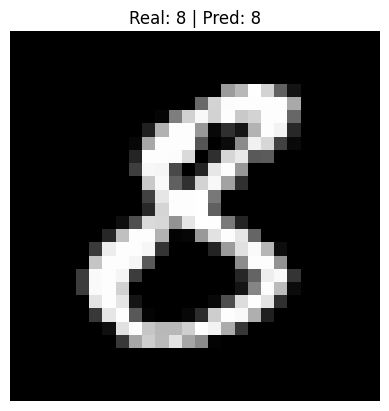

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


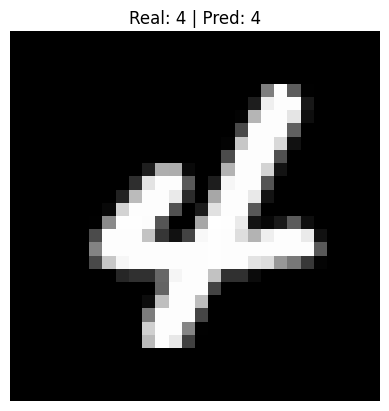

In [7]:
# 5 predicciones aleatorias
for i in np.random.choice(len(x_test), 5):
    img = x_test[i]
    true_label = np.argmax(y_test[i])
    pred_label = np.argmax(model.predict(img[np.newaxis, ...]))
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f"Real: {true_label} | Pred: {pred_label}")
    plt.axis('off')
    plt.show()